# Import Semua Library

In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# cek directory dulu
print(os.getcwd())
desired_path = 'data/'

# Cek directory sekarang
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# Jika bukan di directory 'data/', pindah ke 'data/'
if os.path.basename(current_directory) != 'data':
    if os.path.exists(desired_path):
        os.chdir(desired_path)
        print(f"Changed to directory: {os.getcwd()}")
    else:
        print(f"Directory {desired_path} does not exist.")
else:
    print(f"Already in the directory: {current_directory}")

/content/data
Current directory: /content/data
Already in the directory: /content/data


# Dataset Characteristics

## Gathering data

In [49]:
salary_df = pd.read_csv('indonesian-salary.csv')

In [50]:
salary_df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


## Assesing Data

In [51]:
print("Checking data salary")
salary_df.info()

Checking data salary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  870 non-null    object
 1   SALARY  870 non-null    int64 
 2   YEAR    870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


insight: sudah pas! langsung saja

In [52]:
# Checking duplikasi data
print("Jumlah yang terduplikasi: ", salary_df.duplicated().sum())

Jumlah yang terduplikasi:  0


In [53]:
# Checking data yang hilang dalam data

In [54]:
print("Jumlah data yang hilang: ")
salary_df.isnull().sum()

Jumlah data yang hilang: 


,0
REGION,0
SALARY,0
YEAR,0


insight: data aman tidak ada yang kosong

In [55]:
# Menampilkan statistik data day untuk semua kolom
print(salary_df.describe(include='all'))

       REGION        SALARY         YEAR
count     870  8.700000e+02   870.000000
unique     35           NaN          NaN
top      ACEH           NaN          NaN
freq       26           NaN          NaN
mean      NaN  1.179872e+06  2009.816092
std       NaN  9.175435e+05     7.453930
min       NaN  1.060000e+05  1997.000000
25%       NaN  4.215000e+05  2003.000000
50%       NaN  8.903875e+05  2010.000000
75%       NaN  1.867583e+06  2016.000000
max       NaN  4.452724e+06  2022.000000


## Cleaning Data

if already clean just do it!

In [56]:
# drop row nama indonesia
salary_df = salary_df[salary_df['REGION'] != 'Indonesia']

# Exploratory Data Analysis (EDA)

## Pada tahun berapa provinsi jawa barat lebih tinggi dari provinsi jakarta?

In [57]:
# Filter data untuk Jawa Barat dan Jakarta
jabar_df = salary_df[salary_df["REGION"] == "JAWA BARAT"]
jakarta_df = salary_df[salary_df["REGION"] == "DKI JAKARTA"]

# Bandingkan tahun ketika SALARY Jawa Barat lebih tinggi dari Jakarta
higher_salary_years = jabar_df[jabar_df["SALARY"].values > jakarta_df["SALARY"].values]["YEAR"]
if higher_salary_years.empty:
    print("Tidak ada tahun ketika SALARY Jawa Barat lebih tinggi dari Jakarta.")
else:
    print("Tahun ketika SALARY Jawa Barat lebih tinggi dari Jakarta:", higher_salary_years.tolist())

Tidak ada tahun ketika SALARY Jawa Barat lebih tinggi dari Jakarta.


## Apa ada kenaikan tren gaji tiap tahun?

Text(0, 0.5, 'Rata-rata Gaji')

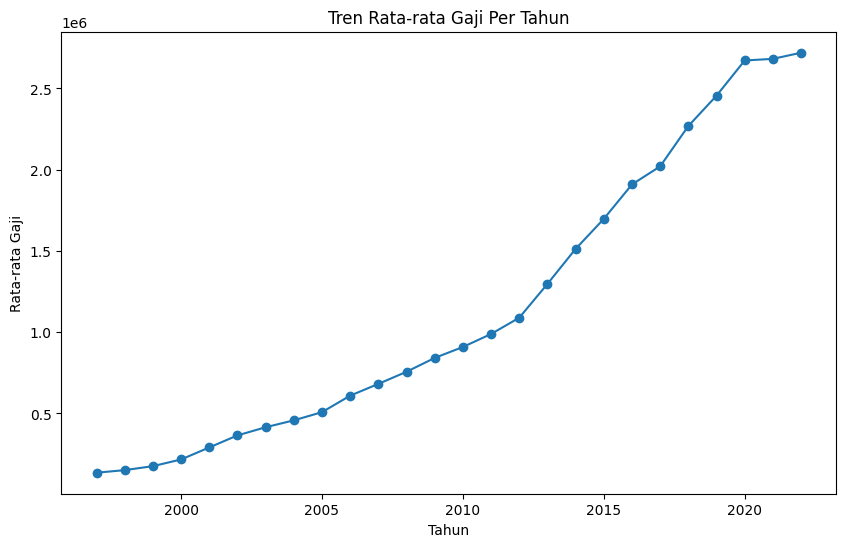

In [58]:
# Rata-rata gaji pertahun
avg_salary_per_year = salary_df.groupby('YEAR')['SALARY'].mean()

# Plot tren gaji pertahun
plt.figure(figsize=(10, 6))
avg_salary_per_year.plot(kind='line', marker='o')
plt.title('Tren Rata-rata Gaji Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Gaji')

## Apakah ada hubungan antara gaji dengan provinsi dan tahun?

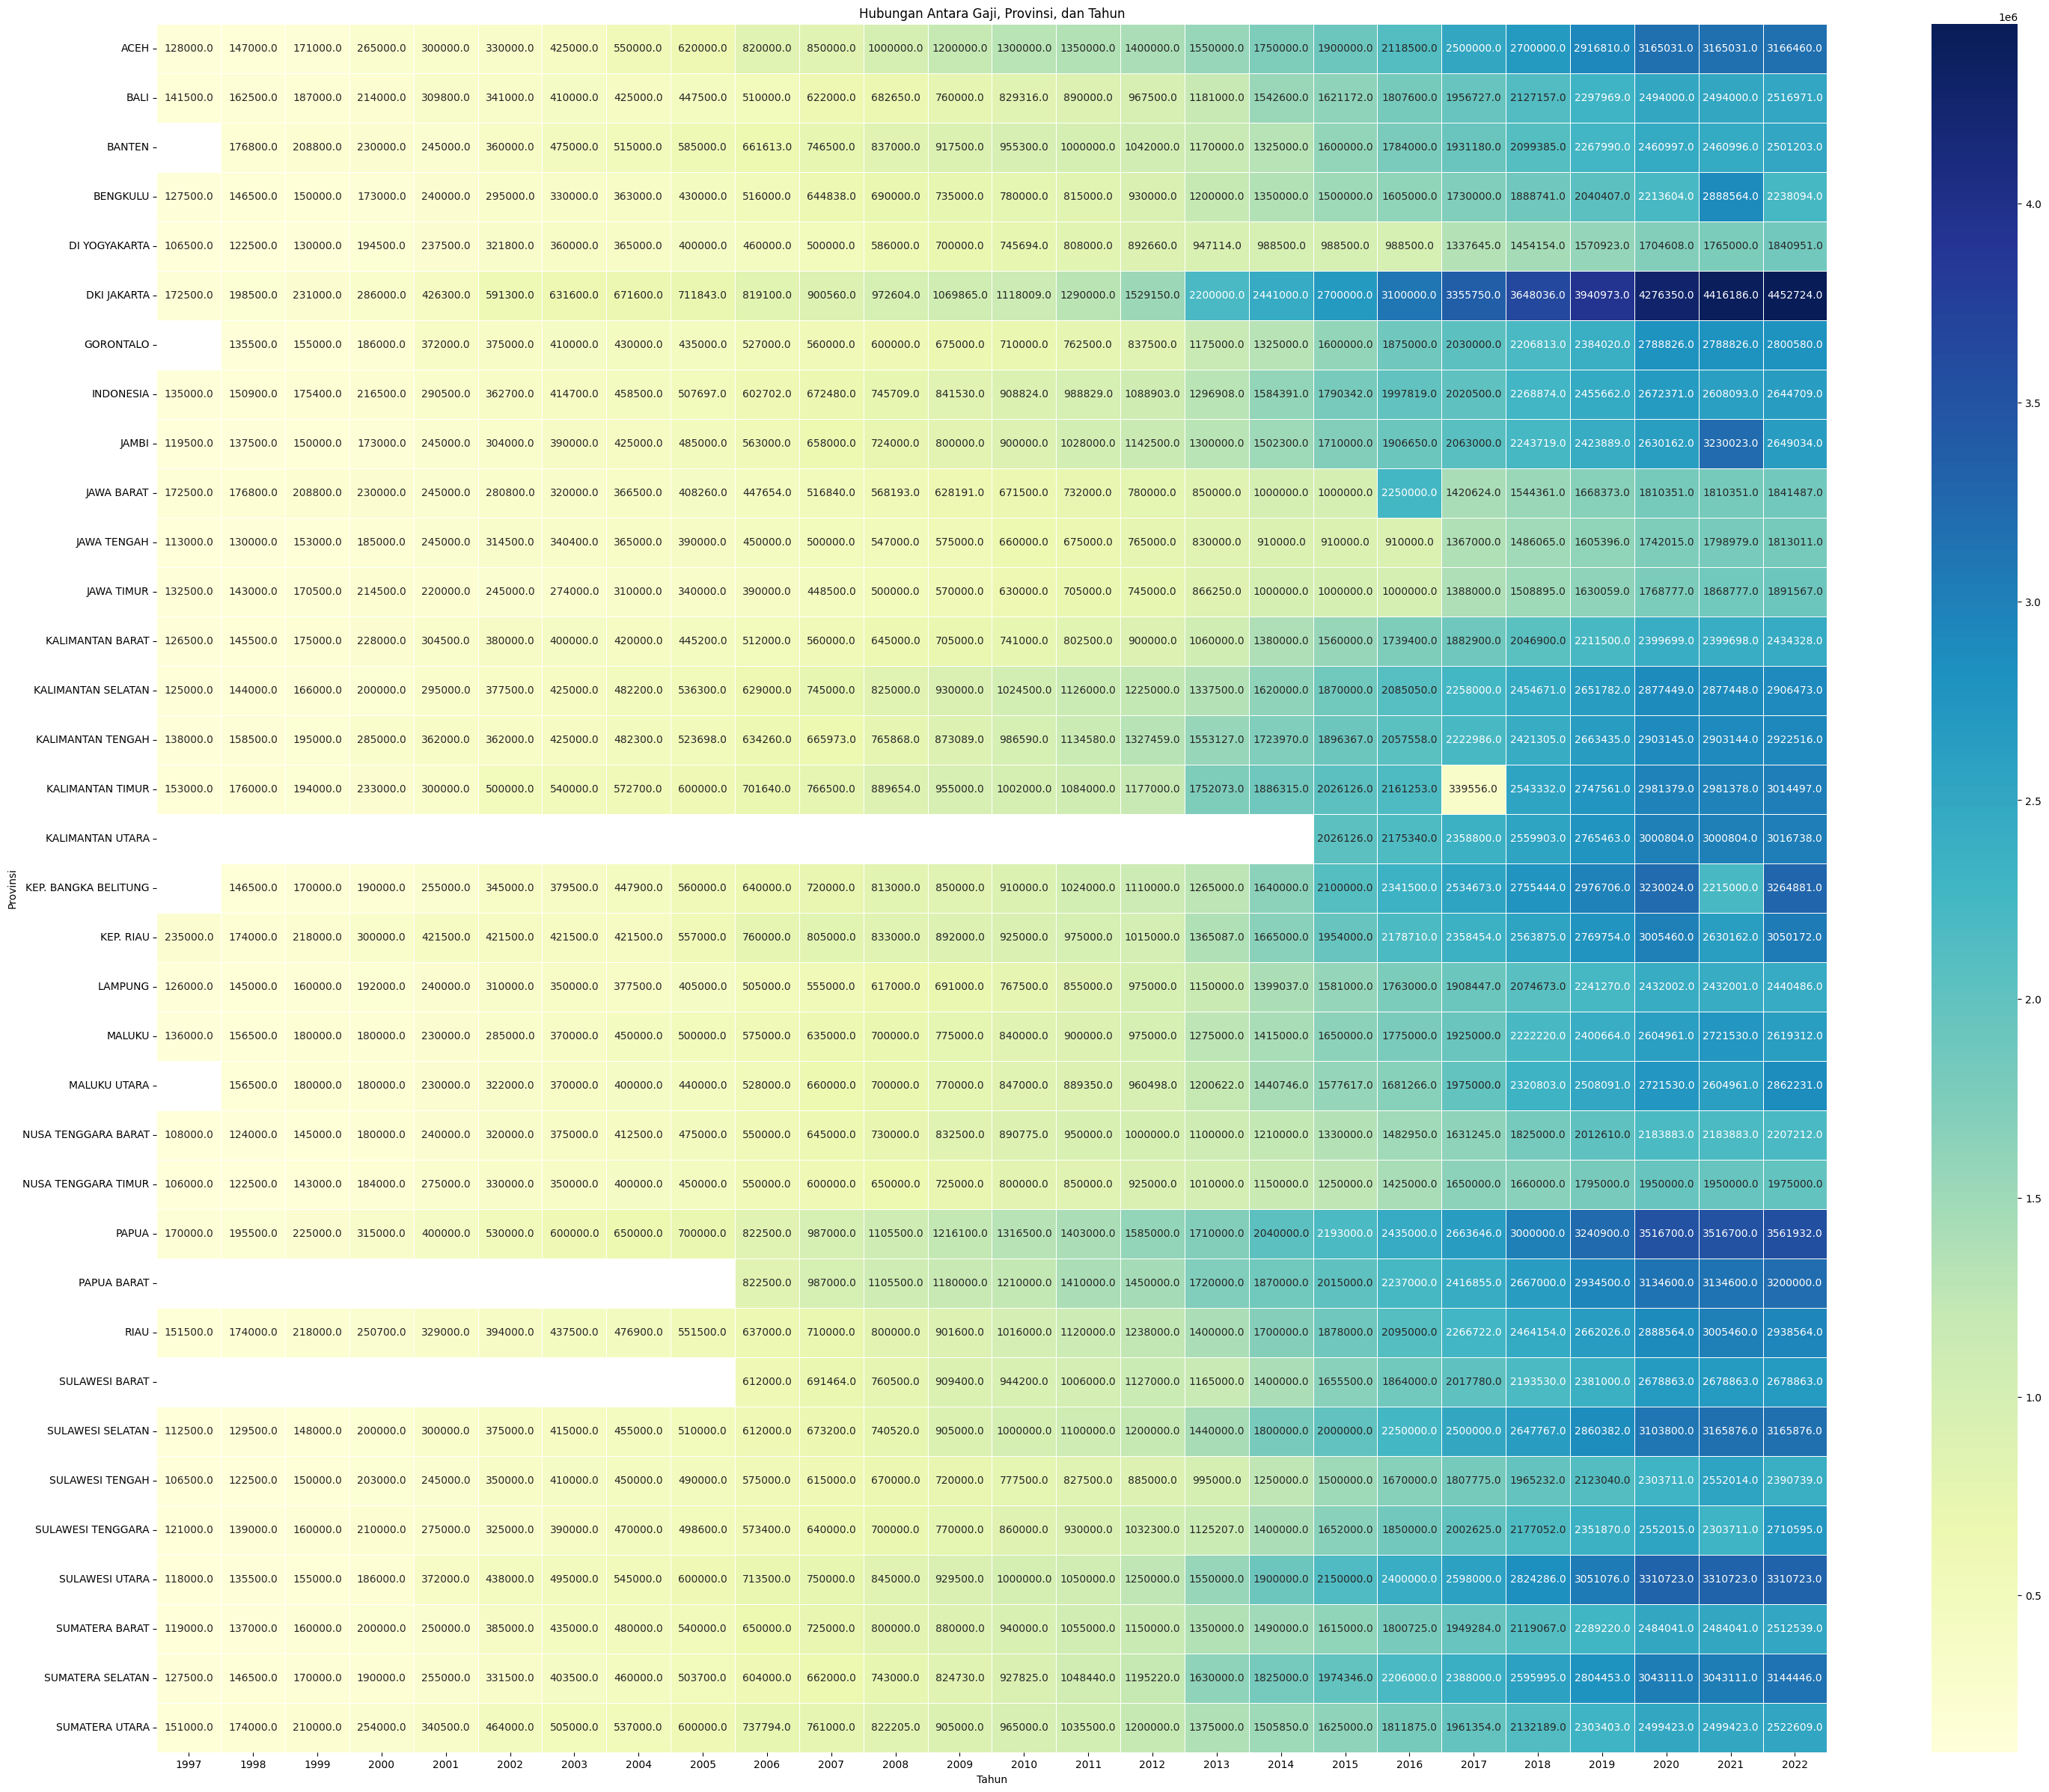

In [59]:
# rata-rata gaji per provinsi dan tahun
avg_salary_per_region_year = salary_df.groupby(['REGION', 'YEAR'])['SALARY'].mean()

# Heatmap gaji avg per provinsi dan tahun
plt.figure(figsize=(36, 30))
sns.heatmap(avg_salary_per_region_year.unstack(), cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Hubungan Antara Gaji, Provinsi, dan Tahun')
plt.ylabel('Provinsi')
plt.xlabel('Tahun')
plt.show()

# Prediksi Gaji Jawa Barat